In [115]:
%pylab qt
%matplotlib inline

import scipy.constants as cst
import scipy.special as spe
import random as rd
import fitting

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

def lamedair(theta, e):
    return 2*e*np.cos(theta)

def coindair(x, alpha):
    return 2*alpha*x

def intensity_1d(delta, wavelength=1, scale=1):
    phi = 2*np.pi/wavelength * delta
    return scale * (1+np.cos(phi))

def intensity_lamedair(x, y, e):    
    N = len(x)
    Z = []
    for i in range(N):
        Z.append(np.zeros(N))
    Z = np.array(Z)
    for i, yval in enumerate(y):
        for j, xval in enumerate(x):
            r = np.sqrt(xval**2+yval**2)
            theta = np.arcsin(r)
            delta = lamedair(theta, e)
            Z[i,j] = intensity_1d(delta, wavelength=1, scale=1)
    return Z

def intensity_2d(x, y):
    N = len(x)
    Z = []
    for i in range(N):
        Z.append(np.zeros(N))
    Z = np.array(Z)
    for i, yval in enumerate(y):
        for j, xval in enumerate(x):
            r = np.sqrt(xval**2+yval**2)
            Z[i,j] = intensity_1d(r)
    return Z

def ref_amp(phi, r=0.8):
    return r*(1 - np.exp(-1j*phi)) / (1 - r**2*np.exp(-1j*phi))

def tra_amp(phi, r=0.8):
    T = 1-r**2
    return T / (1 - r**2*np.exp(-1j*phi))

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
t12 = 2/(1+1.5)
t21 = 2*1.5/(1+1.5)
r12 = (1-1.5)/(1+1.5)
r21 = -r12

print("Cas d'une lame de verre à faces parallèles")
print("amplitude")
print("transmission", t12*t21, t12*t21*r12*r21, t12*t21*(r12*r21)**2)
print("reflexion   ", r12, t12*t21*r21, t12*t21*(r12)**3)
print("intensité")
print("transmission", (t12*t21)**2, (t12*t21*r12*r21)**2, (t12*t21*(r12*r21)**2)**2)
print("reflexion   ", (r12)**2, (t12*t21*r21)**2, (t12*t21*(r12)**3)**2)

Cas d'une lame de verre à faces parallèles
amplitude
transmission 0.96 -0.038400000000000004 0.0015360000000000007
reflexion    -0.2 0.192 -0.007680000000000002
intensité
transmission 0.9216 0.0014745600000000002 2.359296000000002e-06
reflexion    0.04000000000000001 0.036864 5.898240000000003e-05


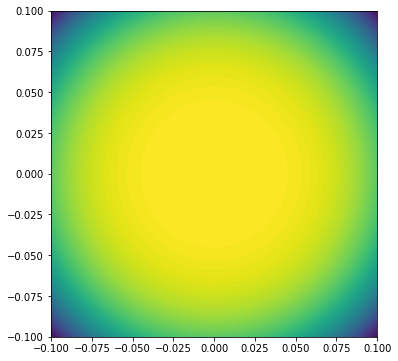

In [51]:
N    = 101
span = 0.1
e    = 5

x = np.linspace(-span, span, N)
y = np.linspace(-span, span, N)

z = intensity_lamedair(x,y,e)

plt.figure(figsize=(8,6))
sps = (1,1)

ax1 = plt.subplot2grid(sps, (0,0))

ax1.contourf(x,y,z, 101)
ax1.set_aspect("equal")

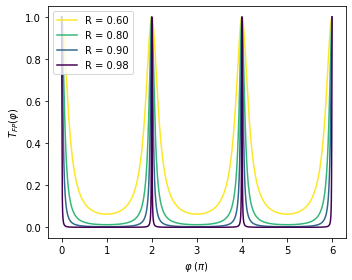

In [120]:
plt.figure(figsize=(5,4))

phi = np.linspace(0,3,10001)*2*np.pi

Rs = 1-np.array([0.4,0.2,0.1,0.02])
colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(Rs))][::-1]
for i,R in enumerate(Rs):
    amp = tra_amp(phi, np.sqrt(R))
    plt.plot(phi/np.pi, np.abs(amp)**2, color=colorst[i], label="R = %4.2f"%(R))
plt.xlabel("$\\varphi\ (\pi)$")
plt.ylabel("$T_{FP}(\\varphi)$")
plt.legend(loc="upper left")

mysavefig("cavity_transmission.png")

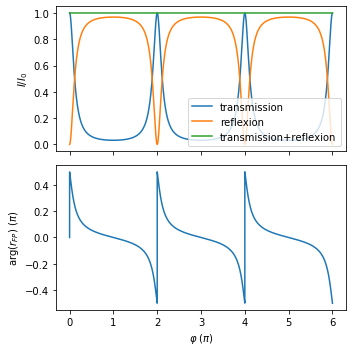

In [151]:
plt.figure(figsize=(5,5))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

phi = np.linspace(0,3,10001)*2*np.pi

R = 1-0.3
tra = tra_amp(phi, np.sqrt(R))
ref = ref_amp(phi, np.sqrt(R))

ax1.plot(phi/np.pi, np.abs(tra)**2, label="transmission")
ax1.plot(phi/np.pi, np.abs(ref)**2, label="reflexion")
ax1.plot(phi/np.pi, np.abs(ref)**2+np.abs(tra)**2, label="transmission+reflexion")
ax1.set_xticklabels([])
ax1.set_ylabel("$I/I_0$")
ax1.legend(loc="lower right")

ax2.plot(phi/np.pi, np.angle(ref)/np.pi)
ax2.set_xlabel("$\\varphi\ (\pi)$")
ax2.set_ylabel("$\mathrm{arg}(r_{FP}) \ (\pi)$")

mysavefig("cavity_phase.png")

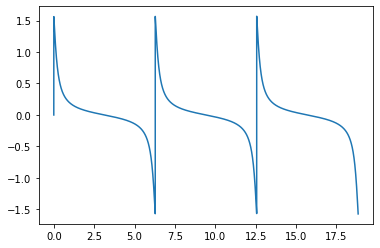

In [144]:
phase = np.angle(ref_amp(phi,r=r))

plt.plot(phi, phase)

In [99]:
5.9e-5*1e6

59.0